## Taller Teoria Cuantica Básica, Observable y Medidas (Juan Esteban Rodríguez)


Sistema Cuantico 4.1 

In [1]:
import numpy as np

class QuantumSystem:
    def __init__(self, num_positions, ket_vector):
        self.num_positions = num_positions
        self.ket = np.array(ket_vector, dtype=complex)
        assert len(self.ket) == num_positions

    def probability_at_position(self, position):
        assert 0 <= position < self.num_positions
        probability = np.abs(self.ket[position]) ** 2
        return probability

    def transition_probability(self, ket_vector_2):
        ket_2 = np.array(ket_vector_2, dtype=complex)
        assert len(ket_2) == self.num_positions
        inner_product = np.vdot(self.ket, ket_2)
        transition_prob = np.abs(inner_product) ** 2
        return transition_prob

num_positions = 3
ket_1 = [1/np.sqrt(2), 1j/np.sqrt(2), 0]
ket_2 = [0, 1/np.sqrt(2), 1/np.sqrt(2)]

quantum_system = QuantumSystem(num_positions, ket_1)

prob_pos_1 = quantum_system.probability_at_position(0)
print(f"Probabilidad de encontrar la partícula en la posición 0: {prob_pos_1}")

transition_prob = quantum_system.transition_probability(ket_2)
print(f"Probabilidad de transición del estado ket_1 al ket_2: {transition_prob}")


Probabilidad de encontrar la partícula en la posición 0: 0.4999999999999999
Probabilidad de transición del estado ket_1 al ket_2: 0.2499999999999999


Retos de Programacion

- Amplitud de transición 

In [2]:
import numpy as np

def transition_amplitude(ket1, ket2):
    ket1 = np.array(ket1, dtype=complex)
    ket2 = np.array(ket2, dtype=complex)
    inner_product = np.vdot(ket1, ket2)
    return np.abs(inner_product) ** 2

# Ejemplo
ket1 = [1/np.sqrt(2), 1j/np.sqrt(2), 0]
ket2 = [0, 1/np.sqrt(2), 1/np.sqrt(2)]
prob_transicion = transition_amplitude(ket1, ket2)
print(f"Probabilidad de transición: {prob_transicion}")

Probabilidad de transición: 0.2499999999999999


- Media y Varianza de un observable hermitiano

In [3]:
def is_hermitian(matrix):
    return np.allclose(matrix, np.conjugate(matrix.T))

def mean_and_variance(observable, ket):
    ket = np.array(ket, dtype=complex)
    if not is_hermitian(observable):
        raise ValueError("La matriz no es hermitiana.")
    
    mean = np.vdot(ket, np.dot(observable, ket))
    ket_expectation = mean * ket
    variance = np.vdot(ket, np.dot(observable @ observable, ket)) - np.abs(mean) ** 2
    return mean, variance

# Ejemplo
observable = np.array([[1, 0], [0, -1]])
ket = [1/np.sqrt(2), 1/np.sqrt(2)]
media, varianza = mean_and_variance(observable, ket)
print(f"Media: {media}, Varianza: {varianza}")


Media: (-2.2371143170757382e-17+0j), Varianza: (0.9999999999999998+0j)


- Ejercicio 4.3.1


In [1]:
import numpy as np

psi_up = np.array([[1], [0]])
psi_down = np.array([[0], [1]])
S_x_full = np.array([[0, 1], [1, 0]])

psi_after_Sx = np.dot(S_x_full, psi_up)

prob_spin_up = np.abs(np.dot(psi_up.T.conj(), psi_after_Sx))**2
prob_spin_down = np.abs(np.dot(psi_down.T.conj(), psi_after_Sx))**2

print(f"Probabilidad de colapsar en 'spin up': {prob_spin_up[0][0]}")
print(f"Probabilidad de colapsar en 'spin down': {prob_spin_down[0][0]}")


Probabilidad de colapsar en 'spin up': 0
Probabilidad de colapsar en 'spin down': 1


- Ejercicio 4.3.2

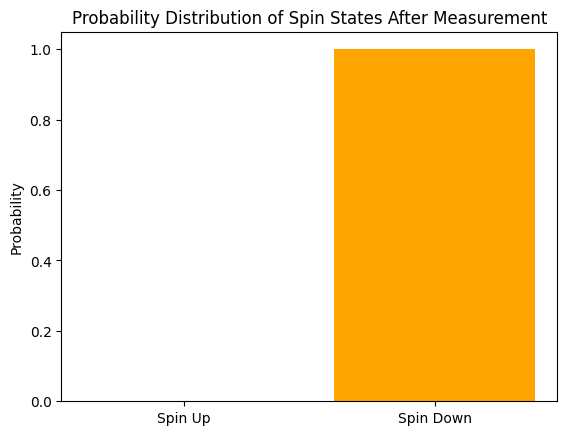

In [2]:
import numpy as np
import matplotlib.pyplot as plt

psi_up = np.array([[1], [0]])
psi_down = np.array([[0], [1]])
S_x_full = np.array([[0, 1], [1, 0]])

psi_after_Sx = np.dot(S_x_full, psi_up)

prob_spin_up = np.abs(np.dot(psi_up.T.conj(), psi_after_Sx))**2
prob_spin_down = np.abs(np.dot(psi_down.T.conj(), psi_after_Sx))**2

probabilities = [prob_spin_up[0][0], prob_spin_down[0][0]]
states = ['Spin Up', 'Spin Down']

plt.bar(states, probabilities, color=['blue', 'orange'])
plt.ylabel('Probability')
plt.title('Probability Distribution of Spin States After Measurement')
plt.show()


- Ejercicio 4.4.1

In [1]:
import numpy as np

U1 = np.array([[0, 1], [1, 0]], dtype=complex)
U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], 
               [np.sqrt(2)/2, -np.sqrt(2)/2]], dtype=complex)

def es_unitaria(U):
    return np.allclose(U.conj().T @ U, np.eye(U.shape[0]))

print("U1 es unitaria:", es_unitaria(U1))
print("U2 es unitaria:", es_unitaria(U2))

U_producto = U1 @ U2
print("El producto U1 * U2 es unitario:", es_unitaria(U_producto))
print("Producto de U1 y U2:\n", U_producto)


U1 es unitaria: True
U2 es unitaria: True
El producto U1 * U2 es unitario: True
Producto de U1 y U2:
 [[ 0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j]]


- Ejercicio 4.4.2

In [2]:
import numpy as np

U = np.array([[0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
              [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
              [1j/np.sqrt(2), 0, 0, -1/np.sqrt(2)],
              [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]], dtype=complex)

psi_0 = np.array([1, 0, 0, 0], dtype=complex)

psi_final = U @ U @ U @ psi_0

prob_posicion_3 = np.abs(psi_final[2])**2

print("Estado final después de tres pasos temporales:\n", psi_final)
print(f"Probabilidad de que la bola esté en la posición 3: {prob_posicion_3:.4f}")


Estado final después de tres pasos temporales:
 [ 0.        +0.00000000e+00j -0.70710678+2.29934717e-17j
 -0.70710678-2.29934717e-17j  0.        +0.00000000e+00j]
Probabilidad de que la bola esté en la posición 3: 0.5000


- Ejercicio 4.5.2 

Para un sistema de partículas con espín 1/2 , cada partícula tiene dos posibles estados de espín:
  - ∣0⟩ — que representa el espín "arriba" (por ejemplo, en el eje z)
  - ∣1⟩ — que representa el espín "abajo"

Cuando tenemos dos partículas, el estado del sistema se describe mediante el producto tensorial de los estados de espín de ambas partículas. Esto resulta en cuatro posibles estados base para el sistema:

  - ∣00⟩, ∣01⟩, ∣10⟩, ∣11⟩

Cada uno de estos estados base representa una combinación diferente de espines para las dos partículas, y el vector de estado general del sistema de dos partículas es una superposición de estos estados base:

  - ∣𝜓⟩ = 𝛼00 ∣00⟩ + 𝛼01 ∣01⟩ + 𝛼10 ∣10⟩ + 𝛼11 ∣11⟩
  donde 𝛼00, 𝛼01 , 𝛼10, 𝛼11 son coeficientes complejos, y la probabilidad total debe estar normalizada


In [3]:
import numpy as np

def state_vector_two_particles(alpha_00, alpha_01, alpha_10, alpha_11):
    basis_states = ['|00⟩', '|01⟩', '|10⟩', '|11⟩']
    state_vector = np.array([alpha_00, alpha_01, alpha_10, alpha_11])
    norm = np.linalg.norm(state_vector)
    normalized_vector = state_vector / norm
    return [(basis_states[i], normalized_vector[i]) for i in range(4)]

coeffs_2_particles = state_vector_two_particles(1 + 1j, 0.5, -0.5j, 0.75)

for state, amplitude in coeffs_2_particles:
    print(f"{state}: {amplitude}")


|00⟩: (0.5714285714285714+0.5714285714285714j)
|01⟩: (0.2857142857142857+0j)
|10⟩: (-0-0.2857142857142857j)
|11⟩: (0.42857142857142855+0j)
